In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [12]:
def H_fm(m, H, deltaJ, dm):
    inplane = np.sqrt(1 - m**2)
    return 6*(-deltaJ*(m**2) - inplane**2) - m*H
    
def H_afm(m, H, deltaJ, dm):
    inplane = np.sqrt(1 - m**2)
    return 6*(-deltaJ*(m**2) + (1/2 - np.sqrt(3)/2*dm)*inplane**2) - m*H

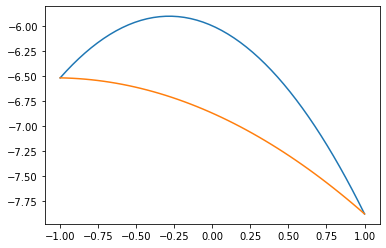

In [13]:
H = 0.68
deltaJ = 1.2
dm = 1.9
xs = np.linspace(-1, 1)
ys1 = H_fm(xs, H, deltaJ, dm)
ys2 = H_afm(xs, H, deltaJ, dm)

plt.plot(xs, ys1)
plt.plot(xs, ys2)

In [16]:
def get_hyst(deltaJ, dm):
    if dm > np.sqrt(3):
        ham = H_afm
    else:
        ham = H_fm
    Hs = np.append(np.linspace(-1, 1, 2000), np.linspace(1, -1, 2000))
    ms = np.linspace(-1, 1)
    minms = []
    lastm = -1
    for H in Hs:
        minms.append(lastm)
        res = scipy.optimize.minimize(ham, lastm, args=(H, deltaJ, dm), bounds=[(-1, 1)])
        lastm = res.x[0]
    return Hs, minms

def plot_hyst(deltaJ, dm):
    Hs, minms = get_hyst(deltaJ, dm)
    plt.plot(Hs, minms)
    plt.xlabel("H")
    plt.ylabel("M")
    plt.title(r"$\Delta J = {}, D = {}$".format(deltaJ, dm))

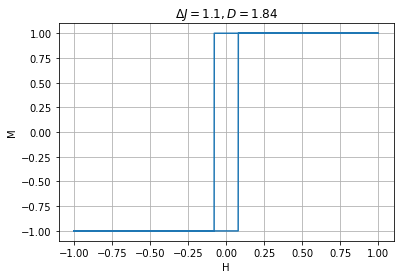

In [27]:
# plot_hyst(1.1, 0)
plot_hyst(1.1, 1.84)
# plot_hyst(1.2, 1.9)
plt.grid()
# plot_hyst(1, 3)

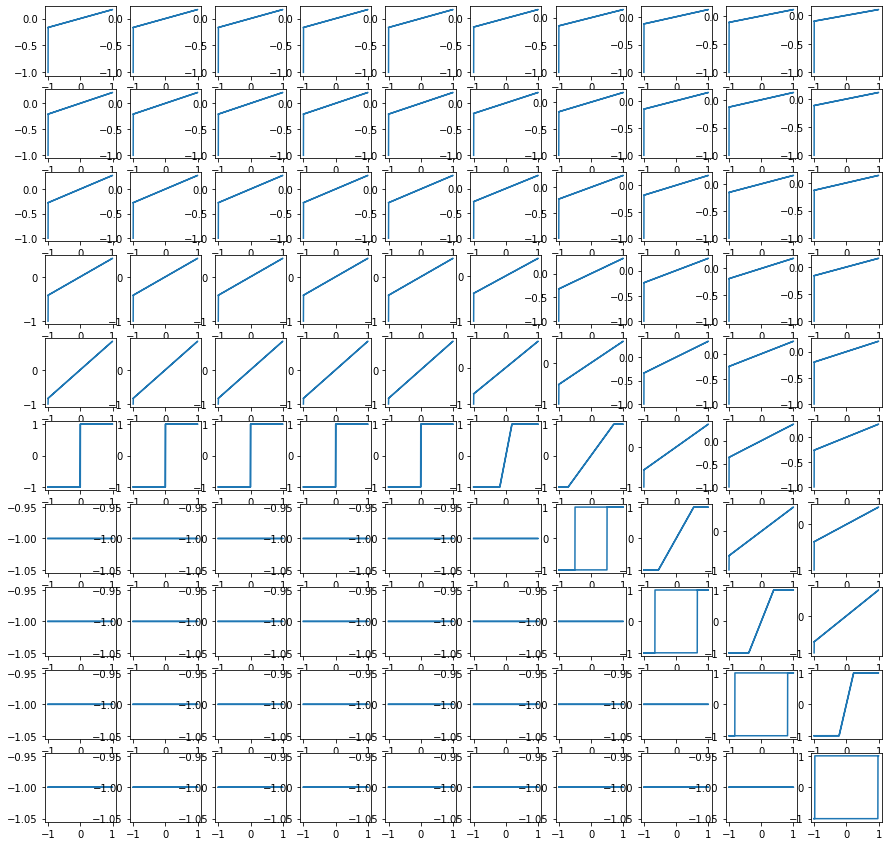

In [21]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))

i = 0
for deltaJ in [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]:
    j = 0
    for dm in [0, 0.5, 1, 1.5, 1.7, 1.75, 1.8, 1.9, 2, 2.1]:
        Hs, minms = get_hyst(deltaJ, dm)
        axs[i][j].plot(Hs, minms)
        j += 1
    i += 1
    